In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyemma

In [2]:
pre_embd = np.load('src/abred_all_nous/embeddings.npz',allow_pickle=True)['arr_0']

In [3]:
embd = np.concatenate(pre_embd)
embd.shape

(1259172, 8)

In [4]:
embd.shape

(1259172, 8)

In [5]:
embd[0][0]

1.7795491218566895

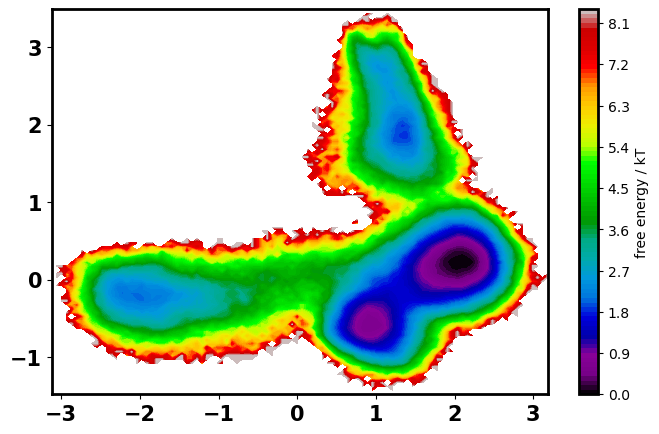

In [6]:
from pylab import *
rc('axes', linewidth=2)
f, ax = plt.subplots(1,1, figsize=(8,5), dpi=100)
pyemma.plots.plot_free_energy(embd[:,0], embd[:,1],ax=ax)

fontsize = 12
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
    
plt.savefig('ab_free_energy_nous.png')

In [7]:
transformed = []
for i in range(1):
    trans_temp = []
    trans_temp= (np.load('src/abred_all_nous/transformed.npz',allow_pickle=True)['arr_0'])
    transformed.append(trans_temp)

In [8]:
len(transformed[0])

5119

In [9]:
#置信区间内，
y_m_t = [] #[n_traj, n_fxx] #满足要求的帧的类别s
inds = [] #[ n_traj, n_fxx] #满足要求的帧的idx
thresh = 0.95
exp = 0 #测试号
now = 0
for i in range(len(transformed[exp])):
    tmp = []
    tmp_ind = []
    for j in range(len(transformed[exp][i])):
        if transformed[exp][i][j].max()>thresh:
            tmp.append(np.argmax(transformed[exp][i][j]))
            tmp_ind.append(int(j+now))
    tmp = np.array(tmp)
    tmp_ind = np.array(tmp_ind)
    y_m_t.append(tmp)
    inds.append(tmp_ind)
    now += len(transformed[exp][i])
    #print(now)

In [10]:
y_m_t = np.concatenate(y_m_t)
inds=np.concatenate(inds).astype(int)

In [11]:
inds

array([      0,       1,       2, ..., 1259169, 1259170, 1259171])

In [12]:
my_dict = {0:0, 1:2, 2:1, 3:3, 4:4}

In [13]:
y_m_t_t = np.vectorize(my_dict.get)(y_m_t)

In [14]:
y_m_t_t.shape

(1013760,)

<Figure size 640x480 with 0 Axes>

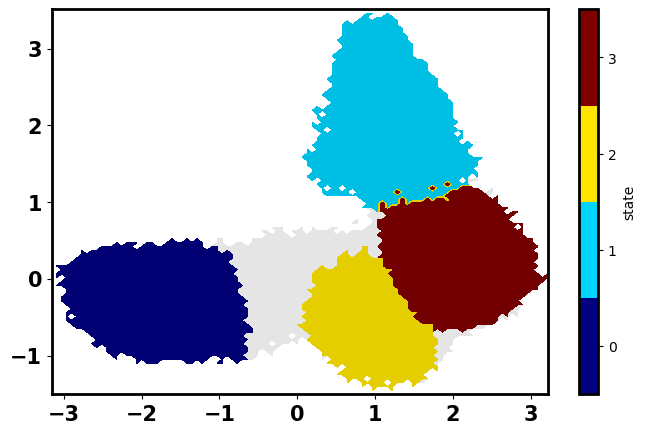

In [15]:
from pylab import *
plt.set_cmap('jet')
rc('axes', linewidth=2)
f, ax = plt.subplots(1,1, figsize=(8,5))
pyemma.plots.plot_state_map(embd[inds,0], embd[inds,1], y_m_t_t, ax=ax, ncontours=100)

fontsize = 12
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
    

pyemma.plots.plot_state_map(embd[:,0], embd[:,1], np.zeros(embd[:,0].shape[0]), ax=ax, alpha=0.1, mask=True, cbar=False,cmap='Greys')
plt.savefig('ab_nous.png')